# Funciones, derivadas y el algoritmo del descenso del gradiente
El siguiente noteboook tiene como objetivo sintetizar y consolidar tres conceptos aprendidos: funciones, derivadas y el algoritmos del descenso del gradiente 

```mermaid
graph LR
    A(Funciones) --> B(Derivadas)
    B --> C(Algoritmo del descenso del gradiente)
```
El orden de presentación sigue una estructura lógica de aprendizaje:

- **Funciones**: Base para comprender las derivadas.

- **Derivadas**: Concepto clave para entender cómo funciona el descenso del gradiente.

- **Algoritmo de descenso del gradiente**: Aplicación práctica de las derivadas en optimización.

Este enfoque permite asimilar cada concepto paso a paso, construyendo sobre lo aprendido anteriormente.

## Funciones 
Las funciones son **relaciones** entre elementos de dos conjuntos 

```mermaid
    graph LR
    A(Entrada) --> B[Función]
    B --> C(Salida)
```

Algunos ejemplos de funciones de $f: \mathbb{R}  \rightarrow \mathbb{R}$ son
$$
f(x) = x^2, \quad f(x) = 3x. 
$$
En lo siguiente se verá cómo es que se pueden definir estos objetos en python

In [1]:
# Definiendo la primera funcion f(x) = x**2
def cuadrado(x):
    return x**2

In [2]:
# Llamando a llamar la función 
x = 5
y = cuadrado(x)
print(f"Este es el cuadrado de {x}: {y}")

Este es el cuadrado de 5: 25


In [3]:
# También se puede definir funciones iterativas y se pueden usar condicionales
def funcion_iterativa(x):
    resultado = 0
    contador = int(abs(x))
    for i in range(contador):
        if x > 0:
            resultado += x
        else:
            resultado -= x
    return resultado 
# LLando a la función 
x = 10
resultado = funcion_iterativa(x)
print(f"Este es el resultado de mi función iterativa cuando x = {x}: {resultado}")

Este es el resultado de mi función iterativa cuando x = 10: 100


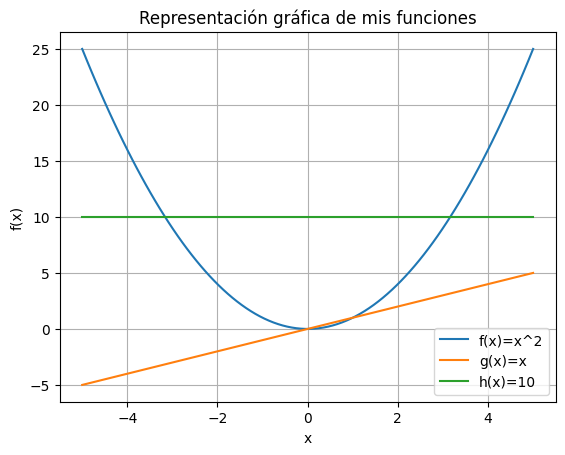

In [4]:
# Una parte importante al hacer funciones es poder visualizarlas 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función identidad 
def identidad(x):
    return x

# Función constate 
def constante(x):
    c = 10
    return np.full_like(x, 10)

# Se definen los valores de x y se aplican las funciones 
x_vals = np.linspace(-5, 5, 100)
y_vals = cuadrado(x_vals)
y2_vals = identidad(x_vals)
y3_vals = constante(x_vals)

# Se crea la gráfica 
plt.figure()
plt.plot(x_vals, y_vals, label='f(x)=x^2')
plt.plot(x_vals, y2_vals, label='g(x)=x')
plt.plot(x_vals, y3_vals, label='h(x)=10')
plt.title('Representación gráfica de mis funciones')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


Un ejemplo de una función de $f:\mathbb{R^2}\rightarrow\mathbb{R}$
$$
f(x,y) = x^2 + y^2 
$$

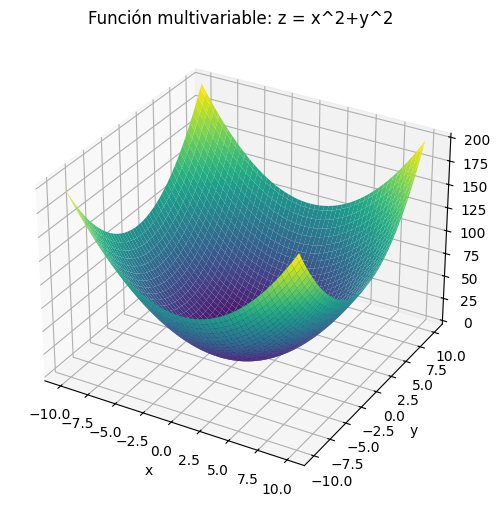

In [5]:
# Definiendo la función en python 
def miFuncion(x,y):
    return x**2 + y**2

x_vals = np.linspace(-10,10,100)
y_vals = np.linspace(-10,10,100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = miFuncion(X,Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("Función multivariable: z = x^2+y^2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


## Derivadas 
La **derivada** de una función  $f(x)$ de una variable en un punto $a$, denotada por $f'(a)$, se define como el límite:
$$
f'(a) = \lim_{h \to 0} \frac{f(a + h) - f(a)}{h}
$$

Si este límite existe, se dice que $f$ es **diferenciable** en $a$.

### Interpretación Geométrica
La derivada $f'(a)$ representa la **pendiente** de la recta tangente a la gráfica de $f$ en el punto $(a, f(a))$.

### Notaciones Alternativas
- Leibniz: $\frac{df}{dx}(a)$ o $\frac{dy}{dx} \big|_{x = a}$
- Newton:  $\dot{f}(a)$ (usada en física para derivadas temporales)

### Para una función de dos variables
Sea $f(x, y)$ una función de dos variables. Las **derivadas parciales** de $f$ con respecto a $x$ y $y$ en el punto $(a, b)$ se definen como los siguientes límites (si existen):

#### Derivada parcial respecto a $x$:
$$
\frac{\partial f}{\partial x}(a, b) = \lim_{h \to 0} \frac{f(a + h, b) - f(a, b)}{h}
$$

#### Derivada parcial respecto a $y$:
$$
\frac{\partial f}{\partial y}(a, b) = \lim_{k \to 0} \frac{f(a, b + k) - f(a, b)}{k}
$$

### Notación alternativa
- **Notación de subíndice**:  
  $ f_x(a, b) $ para $\frac{\partial f}{\partial x}$,  
  $ f_y(a, b)$ para $ \frac{\partial f}{\partial y}$.

- **Notación de Leibniz**:  
  $ \frac{\partial}{\partial x} f(a, b) $ o $ \left. \frac{\partial f}{\partial x} \right|_{(a, b)} $.

### Interpretación Geométrica
- $ \frac{\partial f}{\partial x}$ es la pendiente de la recta tangente a la curva obtenida al cortar la superficie $ z = f(x, y) $ con el plano $ y = b $ (constante).
- $ \frac{\partial f}{\partial y} $ es análoga, pero cortando con $ x = a $.

---

### Generalización para $n$ variables
Para $ f(x_1, x_2, \dots, x_n) $, la derivada parcial respecto a $ x_i $ es:
$$
\frac{\partial f}{\partial x_i} = \lim_{h \to 0} \frac{f(x_1, \dots, x_i + h, \dots, x_n) - f(x_1, \dots, x_n)}{h}
$$

In [6]:
import torch

print("Función de una variable")
# Variable independiente con gradiente habilitado
x = torch.tensor(2.0, requires_grad=True)

# Se define la función 
y = x**2 + 3*x 

# Esta es su derivada a analitica 
DyDx = 2*x + 3

# Se calcula la derivada
y.backward()

# Mostrar el gradiente

print(f"La derivada de y respecto a x en x=2 es: {x.grad}")
print(f"La derivada analítica de y respecto a x en x=2 es: {DyDx}")

print("Función de dos variables")
# Variables independientes con gradientes habilitados 
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Se define la función 
z = 3*x+2*y

# Se calcula la derivada 
z.backward()
print(z)
print(f"La derivda de z con respecto de x en x=2 es: {x.grad}")
print(f"La derivada de z con respecto a y en y = 3 es: {y.grad}")


Función de una variable
La derivada de y respecto a x en x=2 es: 7.0
La derivada analítica de y respecto a x en x=2 es: 7.0
Función de dos variables
tensor(12., grad_fn=<AddBackward0>)
La derivda de z con respecto de x en x=2 es: 3.0
La derivada de z con respecto a y en y = 3 es: 2.0


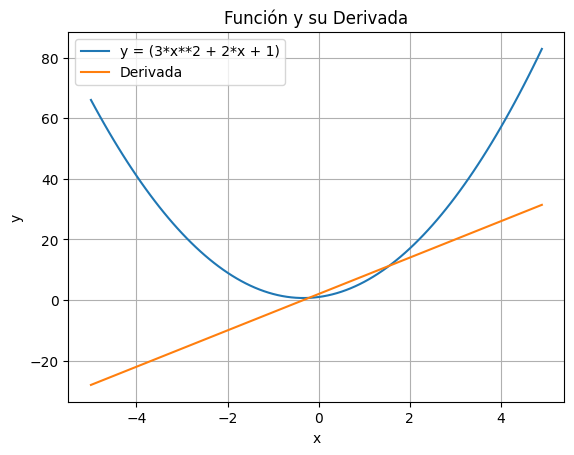

In [7]:
# Dominio de la función
x = torch.arange(-5,5,0.1, requires_grad=True)

# Definir la función
y = (3*x**2 + 2*x + 1)

# Calcular la derivada usando backward
y.backward(torch.ones_like(x)) # Se usa un tensor de unos como gradiente inicial

# Obtener la derivada
derivada = x.grad

# Convertir a numpy para graficar
dominio_np = x.detach().numpy()
y_np = y.detach().numpy()
derivada_np = derivada.detach().numpy()

# Graficar la función y su derivada
plt.plot(dominio_np, y_np, label='y = (3*x**2 + 2*x + 1)')
plt.plot(dominio_np, derivada_np, label='Derivada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función y su Derivada')
plt.legend()
plt.grid(True)
plt.show()


### ¿Cómo funciona `autograd` en PyTorch?

Cuando se usa `requires_grad=True` en un tensor de PyTorch, se activa el sistema de **autodiferenciación automática**, lo que permite calcular derivadas de funciones de forma automática.
PyTorch construye un **grafo computacional dinámico** de las operaciones realizadas, y lo utiliza para aplicar la **regla de la cadena** cuando se llama al método `.backward()`.

### Lógica del cálculo de derivadas

PyTorch usa **diferenciación automática inversa** (*reverse-mode autodiff*), que sigue este proceso:

1. **Construcción del grafo** de operaciones desde los tensores de entrada hasta la salida.
2. Llamada a `backward()` para **recorrer el grafo hacia atrás**, desde la salida hasta las entradas.
3. Aplicación de la **regla de la cadena** para propagar gradientes.
4. Almacenamiento de los gradientes en el atributo `.grad` de cada tensor.

Ejemplo la función que se desea derivar es:
$$
y = (3x^2 + 2x + 1)^2
$$
Durante el **forward pass**, esta función se descompone en operaciones elementales:

1. $a = x^2$
2. $b = 3a$
3. $c = 2x$
4. $u = b + c + 1$
5. $y = u^2$

El grafo computacional resultante es:

\begin{array}{ccccc}
 & & x & & \\
 & \swarrow & & \searrow & \\
 a & & & & c \\
 \downarrow & & & & \downarrow \\
 b & & & &  \\
 & \searrow & & \swarrow & \\
 & & u & & \\
 & & \downarrow & & \\
 & & y & & \\
\end{array}

Esto también se puede visualizar usando la librería `torchviz`

In [8]:
from torchviz import make_dot

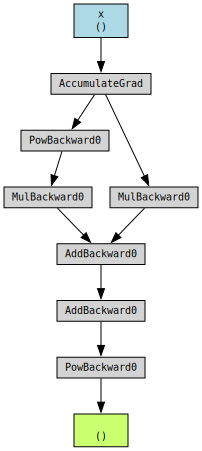

In [9]:
x = torch.tensor(2.0, requires_grad=True)
y = (3*x**2 + 2*x + 1)**2
make_dot(y, params={'x': x})
# make_dot(z, params={'x': x, 'y': y}).render("grafo", format="png")

## Algoritmo del descenso del gradiente 
Este es un algoritmo iterativo de optimización que se usa para encontrar el mínimo de una función mediante su derivada y un punto inicial $x_0$ que va a ir actualizando su posición de manera iterativa. Para una función de una variable se escribe como: 
$$
x_{n+1} = x_{n} -\lambda\frac{df}{dx_{n}},
$$
mientras que para una función multivariable se escribe como: 
$$
x_{n+1} = x_{n} - \lambda \nabla f(x_n).
$$

donde $x_n$ es la posición en la iteración $n$, $\lambda$ es la tasa de aprendizaje, y $\nabla f(x_n)$ es el gradiente de la función $f$ en el punto $x_n$. El gradiente negativo de una función es la dirección de descenso más pronunciado. El algoritmo continúa hasta que converge a un mínimo local, es decir, un punto donde la función tiene su valor más bajo en una vecindad del punto.

---
### Ejemplo práctico 
Para la función 
$$ 
f(x) = x^2,
$$
su derivada es 
$$
f'(x) = 2x
$$


Este es el punto encontrado: 0.00014272476927059603
Esta es mi función evaluada en ese punto: 2.0370359763344873e-08


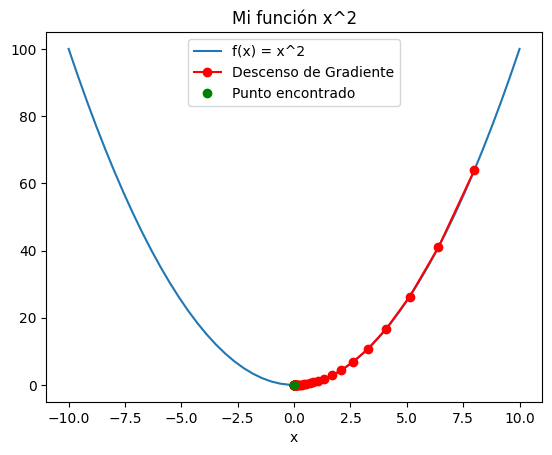

In [10]:
# Definimos la derivada de la función y los hiperparámetros  
def derivada(x):
    return 2*x
x_0 = 10
l = 0.1
n = 50
x_values = []
f_values = []

# Hacemos la iteración 
for i in range(n):
    x_0 = x_0 - l*derivada(x_0)
    x_values.append(x_0)
    f_values.append(cuadrado(x_0)) # ya habíamos definido nuestra función al principio del notebook
    
resultado = cuadrado(x_0)
print(f"Este es el punto encontrado: {x_0}")
print(f"Esta es mi función evaluada en ese punto: {resultado}")

# Graficamos la función 
x_plot = np.linspace(-10,10,50)
y_plot = cuadrado(x_plot) 
plt.figure()
plt.title('Mi función x^2')
plt.plot(x_plot,y_plot, label='f(x) = x^2')
plt.plot(x_values,f_values, 'ro-', label='Descenso de Gradiente')
plt.plot(x_0, resultado, 'go', label='Punto encontrado')
plt.xlabel('x')
plt.legend()
plt.show()
    

Se puede hacer lo mismo pero ahora usando `pytorch`

Este es el punto encontrado: 0.00014272479165811092
Esta es mi función evaluada en ese punto: 2.0370366726751854e-08


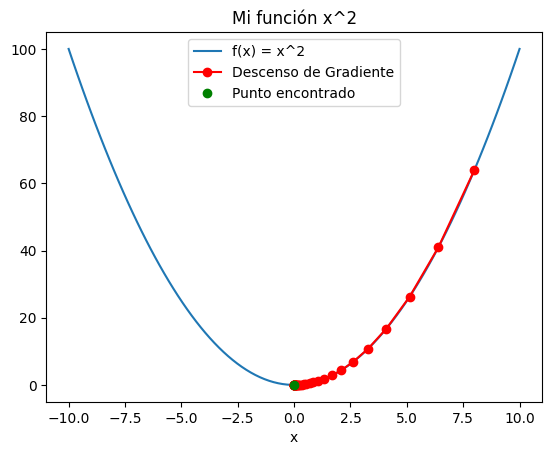

In [11]:

# Hiperparámetros
x_0 = torch.tensor(10.0, requires_grad=True) # Definimos nuestro punto inicial como un tensor 
l = 0.1 
n = 50   

x_values = []
f_values = []

for i in range(n):
    # Calcular f(x)
    y = cuadrado(x_0)
    # Hacer backward para obtener la derivada
    y.backward()
    # Se hace la iteración
    with torch.no_grad():
        x_0 -= l * x_0.grad

    # Guardar valores
    x_values.append(x_0.item())
    f_values.append(cuadrado(x_0).item())

    # Reiniciar el gradiente para evitar acumulación
    x_0.grad.zero_()

print(f"Este es el punto encontrado: {x_0.item()}")
print(f"Esta es mi función evaluada en ese punto: {cuadrado(x_0).item()}")

# Graficamos el descenso de gradiente
x_plot = np.linspace(-10, 10, 100)
y_plot = cuadrado(x_plot)

plt.figure()
plt.title('Mi función x^2')
plt.plot(x_plot, y_plot, label='f(x) = x^2')
plt.plot(x_values, f_values, 'ro-', label='Descenso de Gradiente')
plt.plot(x_0.item(), cuadrado(x_0).item(), 'go', label='Punto encontrado')
plt.xlabel('x')
plt.legend()
plt.show()


Ahora para una función multivariable, la cual ya se ha definido anteriormente en este notebook
$$
f(x,y) = x^2 + y^2 .
$$


Este es el punto encontrado: [0.00014272 0.00014272]
Este es el valor de mi función evaluada en ese punto: 4.0740719526689746e-08


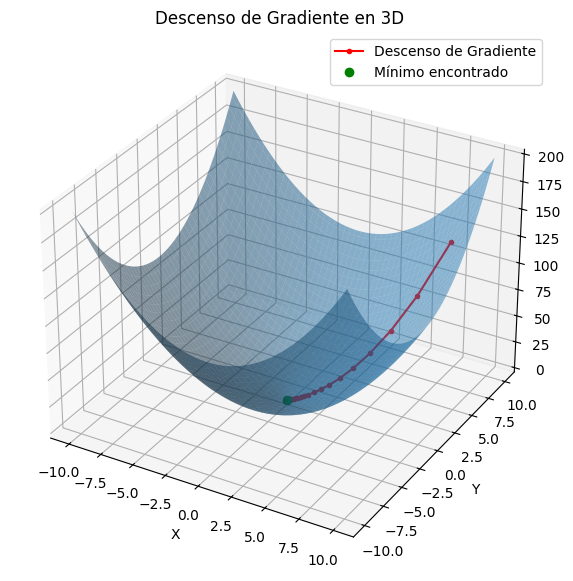

In [12]:
# Definimos el gradiente de la función y los hiperarámetros 
def grad_f(x,y):
    return np.array([2*x, 2*y])

x_0 = np.array([10,10])
l = 0.1
n = 50

x_values = []
z_values = []

for i in range(n):
    x_0 = x_0 - l*grad_f(x_0[0],x_0[1])
    x_values.append(x_0)
    z_values.append(miFuncion(x_0[0],x_0[1]))

resultado = miFuncion(x_0[0],x_0[1])
print(f"Este es el punto encontrado: {x_0}")
print(f"Este es el valor de mi función evaluada en ese punto: {resultado}")

# Preparación de datos para la gráfica
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
Z = miFuncion(X, Y)
x_values = np.array(x_values)

# Visualización
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot(x_values[:,0], x_values[:,1], z_values, 'r.-', label='Descenso de Gradiente')
ax.plot(x_0[0],x_0[1],resultado,'go', label='Mínimo encontrado')
ax.set_title('Descenso de Gradiente en 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()



ahora usando `pytorch`

Este es el punto encontrado: [0.00014272 0.00014272]
Este es el valor de la función evaluada en ese punto: 4.074073345350371e-08


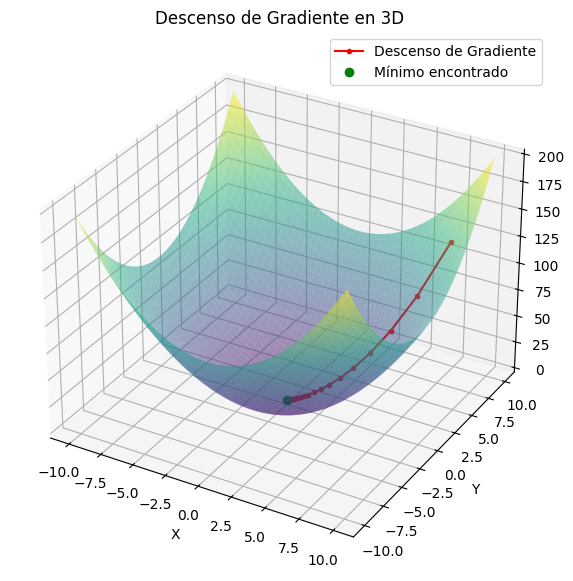

In [13]:

# Hiperparámetros
x_0 = torch.tensor([10.0, 10.0], requires_grad=True) # se define como un vector usando pytorch 
l = 0.1  # tasa de aprendizaje
n = 50   # número de iteraciones

x_values = []
z_values = []

for i in range(n):
    # Calcular la función en el punto inicial 
    z = miFuncion(x_0[0], x_0[1])

    # Backpropagation
    z.backward()

    # Actualización por descenso de gradiente
    with torch.no_grad():
        x_0 -= l * x_0.grad

    # Guardar los valores
    x_values.append(x_0.detach().clone().numpy())
    z_values.append(miFuncion(x_0[0], x_0[1]).item())

    # Limpiar gradientes
    x_0.grad.zero_()

# Mostrar resultado
print(f"Este es el punto encontrado: {x_0.detach().numpy()}")
print(f"Este es el valor de la función evaluada en ese punto: {miFuncion(x_0[0], x_0[1]).item()}")

# Preparar datos para la gráfica 3D
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
Z = X**2 + Y**2  # misma función f(x,y) = x² + y²

x_values_np = np.array(x_values)

# Visualización
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
ax.plot(x_values_np[:, 0], x_values_np[:, 1], z_values, 'r.-', label='Descenso de Gradiente')
ax.plot(x_0[0].item(), x_0[1].item(), miFuncion(x_0[0], x_0[1]).item(), 'go', label='Mínimo encontrado')
ax.set_title('Descenso de Gradiente en 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()
